In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('cheryl_data.csv')
df.head()

,Unnamed: 0,date,total_sleep_hours,sleep_start,sleep_end,total_count,uva,canvas,eqk9vb,drive,last_time,chrome_visit_time_first,chrome_url_first,chrome_title_first,chrome_visit_time_last,chrome_url_last,chrome_title_last,day_of_week
0,0,2025-01-01,8.258333,2025-01-01 02:04:45-05:00,2025-01-01 10:30:15-05:00,43,28,0,15,0,2025-02-23 22:56:56,02:05:20,https://www.google.com/search?q=dsw&rlz=1C1ONG...,dsw - Google Search,22:56:56,https://www.amazon.com/s/ref=nb_sb_noss_2?url=...,Amazon.com : daisque,Wednesday
1,1,2025-01-02,11.283333,2025-01-02 01:25:02-05:00,2025-01-02 16:03:02-05:00,0,0,0,0,0,2025-02-23 02:52:13,01:46:11,https://www.when2meet.com/?28134141-GcoK8,Club Figure Skating Spring 2024 Off Ice - When...,02:52:13,https://www.amazon.com/s?crid=1WQFLCYQMS1FY&i=...,Amazon.com : rice mask,Thursday
2,2,2025-01-03,7.325000,2025-01-03 02:04:16-05:00,2025-01-03 09:45:16-05:00,1,1,0,0,0,2025-02-23 02:14:16,01:56:00,https://www.amazon.com/s?crid=2ZM9BIE3J8XA8&i=...,Amazon.com : canmake,02:14:16,https://www.popflexactive.com/collections/perf...,Perfect Plane Pants - Black – POPFLEX®,Friday
3,3,2025-01-04,7.983333,2025-01-04 02:30:17-05:00,2025-01-04 16:18:02-05:00,0,0,0,0,0,2025-02-23 02:50:25,00:58:56,https://mandrillapp.com/track/click/30837889/b...,My Team Shop,02:50:25,https://bsnteamsports.com/shop/2rkrRzKBQS/myte...,My Team Shop,Saturday
4,4,2025-01-05,5.775000,2025-01-05 02:20:19-05:00,2025-01-05 10:14:49-05:00,37,21,0,10,6,2025-02-23 23:22:58,00:11:47,https://www.netflix.com/browse,Home - Netflix,23:22:58,https://discussions.apple.com/thread/254776692,does an air tag interfere with credit car… - A...,Sunday


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               43 non-null     int64  
 1   date                     43 non-null     object 
 2   total_sleep_hours        38 non-null     float64
 3   sleep_start              38 non-null     object 
 4   sleep_end                38 non-null     object 
 5   total_count              43 non-null     int64  
 6   uva                      43 non-null     int64  
 7   canvas                   43 non-null     int64  
 8   eqk9vb                   43 non-null     int64  
 9   drive                    43 non-null     int64  
 10  last_time                43 non-null     object 
 11  chrome_visit_time_first  43 non-null     object 
 12  chrome_url_first         43 non-null     object 
 13  chrome_title_first       42 non-null     object 
 14  chrome_visit_time_last   43 

In [17]:
df = df.drop(["Unnamed: 0", "date", "sleep_end", "chrome_url_first", "chrome_title_first", "chrome_url_last", "chrome_title_last"], axis=1)
df["last_time"] = pd.to_datetime(df["last_time"])
df['last_time_hour'] = (
    df['last_time'].dt.hour +
    df['last_time'].dt.minute / 60.0
)
df["sleep_start"] = pd.to_datetime(df["sleep_start"])
df['sleep_start_hour'] = (
    df['sleep_start'].dt.hour +
    df['sleep_start'].dt.minute / 60.0
)
df["chrome_visit_time_first"] = pd.to_datetime(df["chrome_visit_time_first"])
df['chrome_visit_time_first_hour'] = (
    df['chrome_visit_time_first'].dt.hour +
    df['chrome_visit_time_first'].dt.minute / 60.0
)
df["chrome_visit_time_last"] = pd.to_datetime(df["chrome_visit_time_last"])
df['chrome_visit_time_last_hour'] = (
    df['chrome_visit_time_last'].dt.hour +
    df['chrome_visit_time_last'].dt.minute / 60.0
)
df = df.drop(["last_time", "sleep_start", "chrome_visit_time_first", "chrome_visit_time_last"], axis=1)
df.head()

C:\Users\janic\AppData\Local\Temp\ipykernel_10044\1825232758.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["chrome_visit_time_first"] = pd.to_datetime(df["chrome_visit_time_first"])
C:\Users\janic\AppData\Local\Temp\ipykernel_10044\1825232758.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["chrome_visit_time_last"] = pd.to_datetime(df["chrome_visit_time_last"])


,total_sleep_hours,total_count,uva,canvas,eqk9vb,drive,day_of_week,last_time_hour,sleep_start_hour,chrome_visit_time_first_hour,chrome_visit_time_last_hour
0,8.258333,43,28,0,15,0,Wednesday,22.933333,2.066667,2.083333,22.933333
1,11.283333,0,0,0,0,0,Thursday,2.866667,1.416667,1.766667,2.866667
2,7.325000,1,1,0,0,0,Friday,2.233333,2.066667,1.933333,2.233333
3,7.983333,0,0,0,0,0,Saturday,2.833333,2.500000,0.966667,2.833333
4,5.775000,37,21,0,10,6,Sunday,23.366667,2.333333,0.183333,23.366667


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_sleep_hours             38 non-null     float64
 1   total_count                   43 non-null     int64  
 2   uva                           43 non-null     int64  
 3   canvas                        43 non-null     int64  
 4   eqk9vb                        43 non-null     int64  
 5   drive                         43 non-null     int64  
 6   day_of_week                   43 non-null     object 
 7   last_time_hour                43 non-null     float64
 8   sleep_start_hour              38 non-null     float64
 9   chrome_visit_time_first_hour  43 non-null     float64
 10  chrome_visit_time_last_hour   43 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.8+ KB


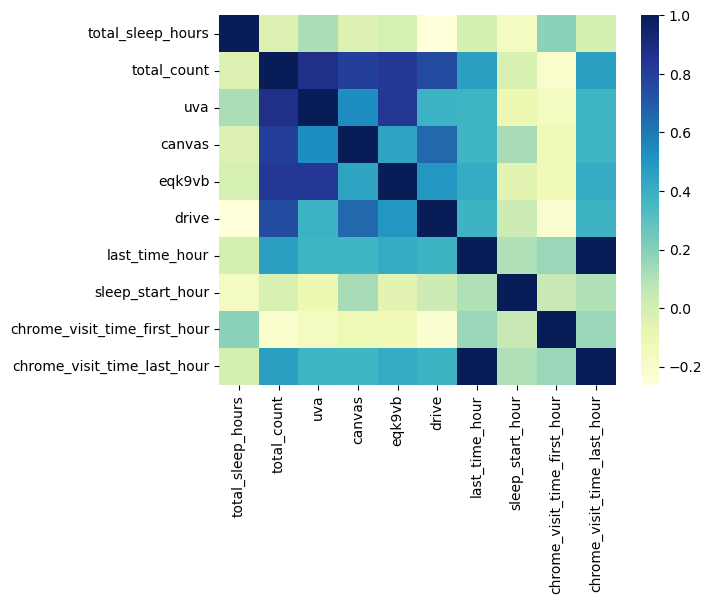

In [29]:
import sklearn
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
corr_matrix.shape

corr_matrix["total_sleep_hours"].sort_values(ascending=False)

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [5]:
df1 = df[df.isna().any(axis=1)]
len(df1)
df1.head()

,total_sleep_hours,total_count,uva,canvas,eqk9vb,drive,day_of_week,last_time_hour,chrome_visit_time_first_hour,chrome_visit_time_last_hour
18,NaN,202,104,28,16,54,Monday,22.266667,0.083333,22.266667
26,NaN,218,49,53,34,82,Wednesday,23.500000,12.516667,23.500000
27,NaN,158,68,39,9,42,Thursday,22.983333,0.383333,22.983333
28,NaN,101,49,5,16,31,Friday,21.100000,2.633333,21.100000
29,NaN,62,18,20,0,24,Saturday,22.750000,17.200000,22.750000


In [19]:
df["total_sleep_hours"].fillna(df["total_sleep_hours"].median(), inplace=True)

In [20]:
df_x = df.drop("total_sleep_hours", axis=1)
df_y = df["total_sleep_hours"].copy()

from sklearn.model_selection import train_test_split
x_train, xtest, y_train, ytest = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

housing_prep = x_train
housing_labels = y_train
test_labels = ytest
housing_num = housing_prep.select_dtypes(include=np.number)
housing_cat = housing_prep.select_dtypes(include="object")

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

num_attribs = housing_num.columns.tolist()
cat_attribs = housing_cat.columns.tolist()

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

housing_tr = full_pipeline.fit_transform(housing_prep)
housing_test = full_pipeline.transform(xtest)

In [9]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_r2 = r2_score(housing_labels, housing_predictions)

print(f"RMSE: {lin_rmse}, MAE: {lin_mae}, R2: {lin_r2}")

RMSE: 0.8158949955164795, MAE: 0.6870076752247678, R2: 0.6449644249067625


In [24]:
lin_scores = cross_val_score(lin_reg, housing_tr, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.97604745 0.78297701 1.79357143 1.71094293 1.51418443]
Mean: 1.5555446508405142
Standard deviation: 0.4138114075031905


In [25]:
feature_names = list(full_pipeline.get_feature_names_out())

coefficients = lin_reg.coef_

# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Sort by absolute value to see the most impactful features
feature_importance["Absolute Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Coefficient", ascending=False)

# Display the top features
print(feature_importance)

                              Feature  Coefficient  Absolute Coefficient
9             cat__day_of_week_Friday    -2.118912              2.118912
14           cat__day_of_week_Tuesday     1.426760              1.426760
12            cat__day_of_week_Sunday    -1.398616              1.398616
10            cat__day_of_week_Monday     1.059498              1.059498
13          cat__day_of_week_Thursday     0.859233              0.859233
15         cat__day_of_week_Wednesday     0.694401              0.694401
11          cat__day_of_week_Saturday    -0.522365              0.522365
7   num__chrome_visit_time_first_hour     0.364051              0.364051
4                          num__drive    -0.318201              0.318201
6               num__sleep_start_hour    -0.295686              0.295686
0                    num__total_count    -0.252694              0.252694
2                         num__canvas    -0.230237              0.230237
1                            num__uva    -0.196899 

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_tr, housing_labels)

housing_predictions = forest_reg.predict(housing_tr)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_r2 = r2_score(housing_labels, housing_predictions)

print(f"RMSE: {forest_rmse}, MAE: {forest_mae}, R2: {forest_r2}")

RMSE: 0.42789666815632094, MAE: 0.33183088235293934, R2: 0.9023479998137878


In [27]:
forest_scores = cross_val_score(forest_reg, housing_tr, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1.50375091 1.19168755 1.60442233 1.67016951 0.94293399]
Mean: 1.382592859655483
Standard deviation: 0.2743474697625615


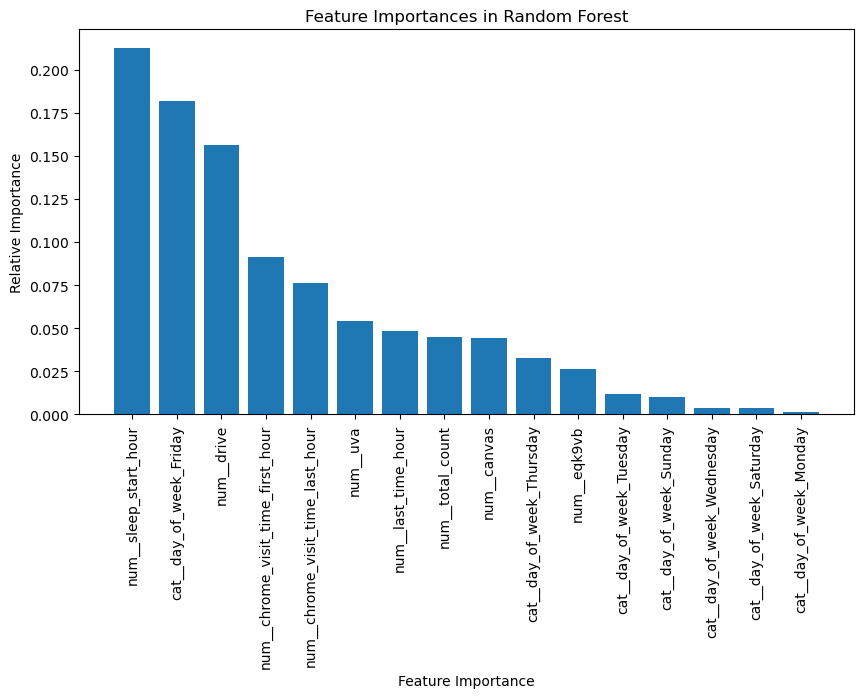

num__sleep_start_hour: 0.2127
cat__day_of_week_Friday: 0.1820
num__drive: 0.1563
num__chrome_visit_time_first_hour: 0.0913
num__chrome_visit_time_last_hour: 0.0760
num__uva: 0.0543
num__last_time_hour: 0.0485
num__total_count: 0.0449
num__canvas: 0.0445
cat__day_of_week_Thursday: 0.0327
num__eqk9vb: 0.0265
cat__day_of_week_Tuesday: 0.0116
cat__day_of_week_Sunday: 0.0099
cat__day_of_week_Wednesday: 0.0037
cat__day_of_week_Saturday: 0.0037
cat__day_of_week_Monday: 0.0015


In [28]:
forest_importances = forest_reg.feature_importances_
sorted_idx = np.argsort(forest_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(forest_importances)), forest_importances[sorted_idx], align="center")
plt.xticks(range(len(forest_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Relative Importance")
plt.title("Feature Importances in Random Forest")
plt.show()

for feature, importance in sorted(zip(feature_names, forest_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")